## 导入数据

In [1]:
library(PoEdata) 

In [2]:
data("andy") # makes the dataset "andy" ready to use 

In [3]:
?andy # shows information about the dataset

## 数据预览

In [4]:
head(andy)

,sales,price,advert
,<dbl>,<dbl>,<dbl>
1,73.2,5.69,1.3
2,71.8,6.49,2.9
3,62.4,5.63,0.8
4,67.4,6.22,0.7
5,89.3,5.02,1.5
6,70.3,6.41,1.3


In [5]:
some(andy)

ERROR: Error in some(andy): 没有"some"这个函数


In [31]:
nrow(andy) # returns the number of observations (raws)

[1] 75

In [ ]:
nobs(modelname) # gives the number of observations used by a model 
#This may be different because of missing values or sub-sampling

## 画图

In [6]:
x<-1:100;y<-x^2

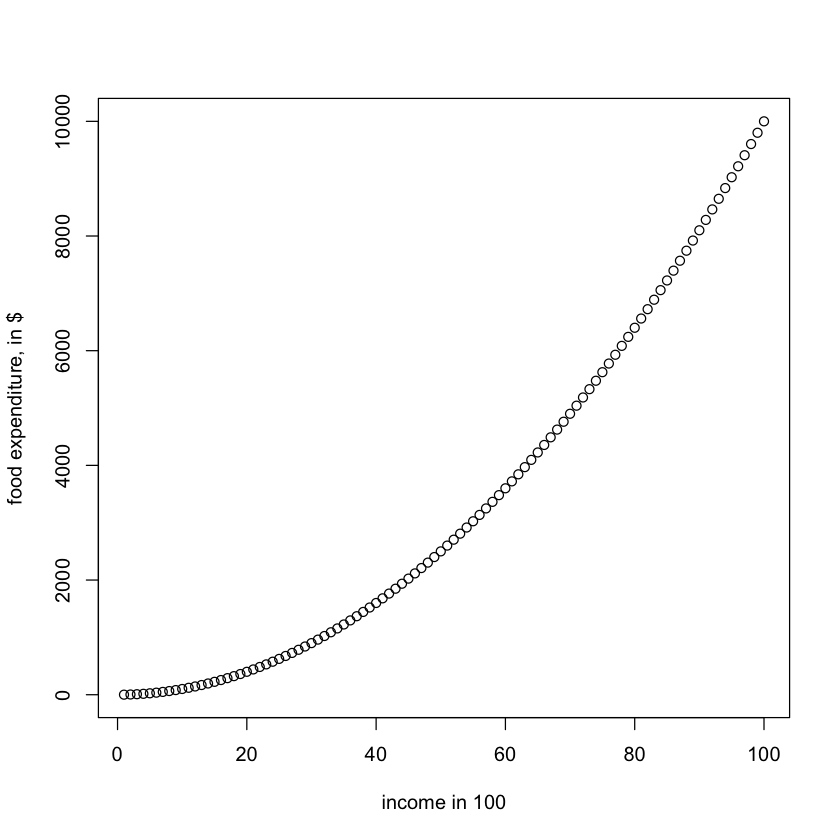

In [7]:
plot(x, y, xlab="income in 100", ylab="food expenditure, in $", type="p")

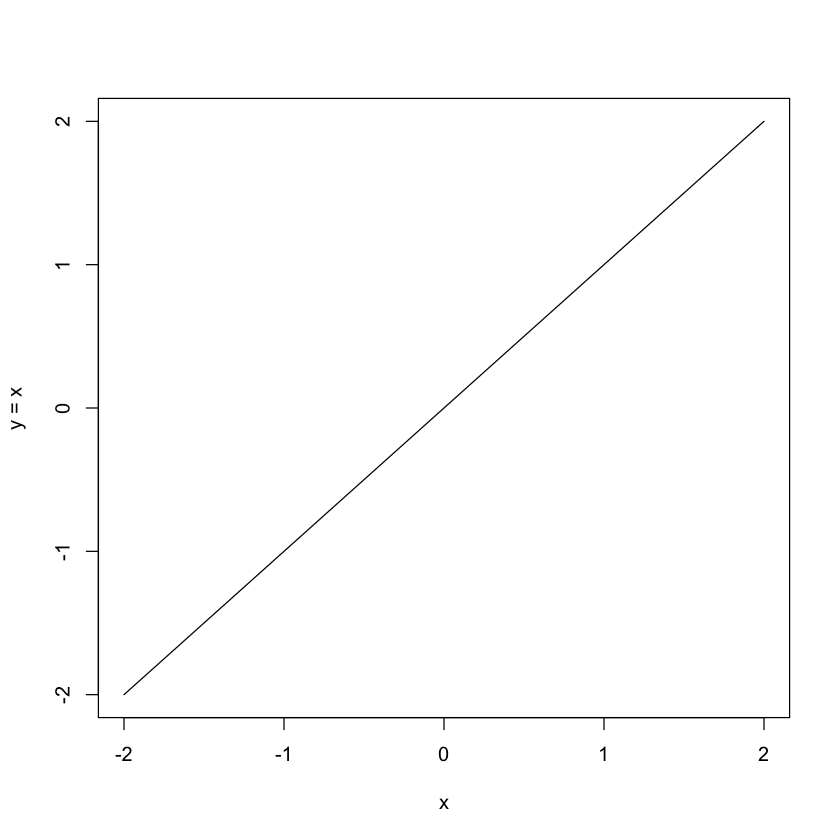

In [8]:
curve(x^1, from=-2, to=2, xlab="x", ylab="y = x" ) #curve() plots a curve described by a mathematical function

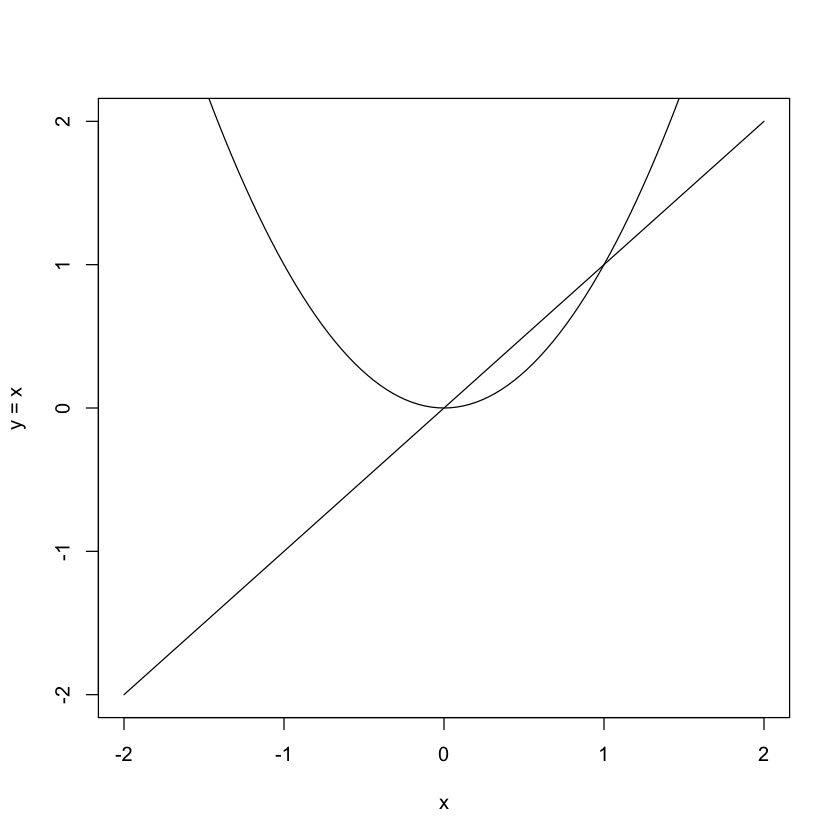

In [11]:
curve(x^1, from=-2, to=2, xlab="x", ylab="y = x" ) 
curve(x^2, add = TRUE) # Add another curve to the existing graph

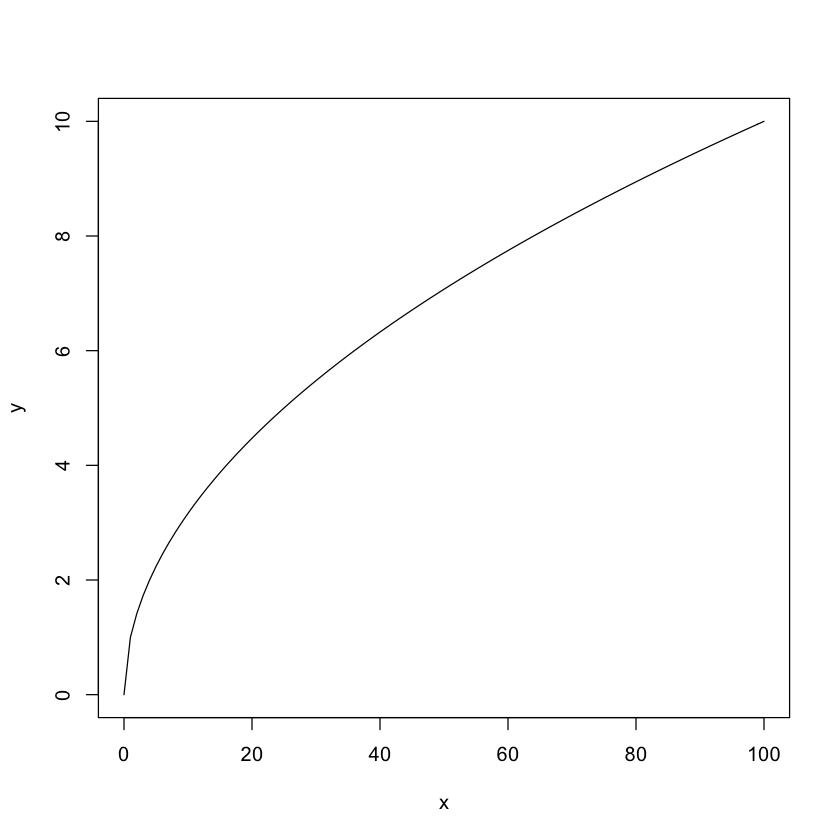

In [12]:
curve(sqrt(x), from=0, to=100, xlab="x", ylab="y") #plot(1:100, type='n') 

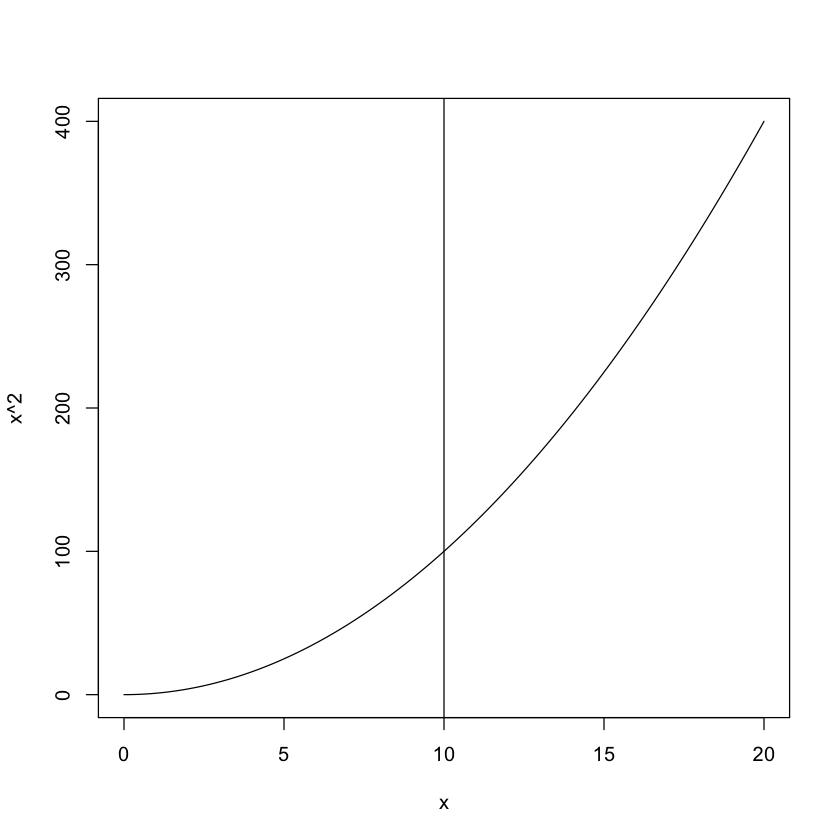

In [13]:
curve(x^2, from=0, to=20) 
abline(v=10)# abline() adds a line defined by its intercept a and slope b to the current graph.

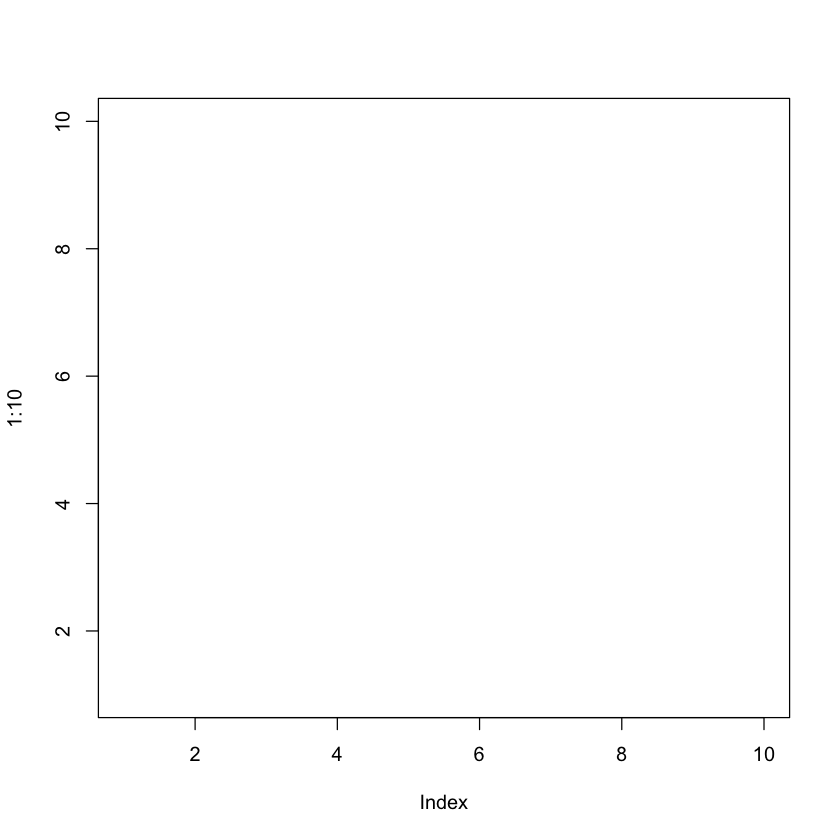

In [15]:
plot(1:10, type="n") # creates an empty graph 

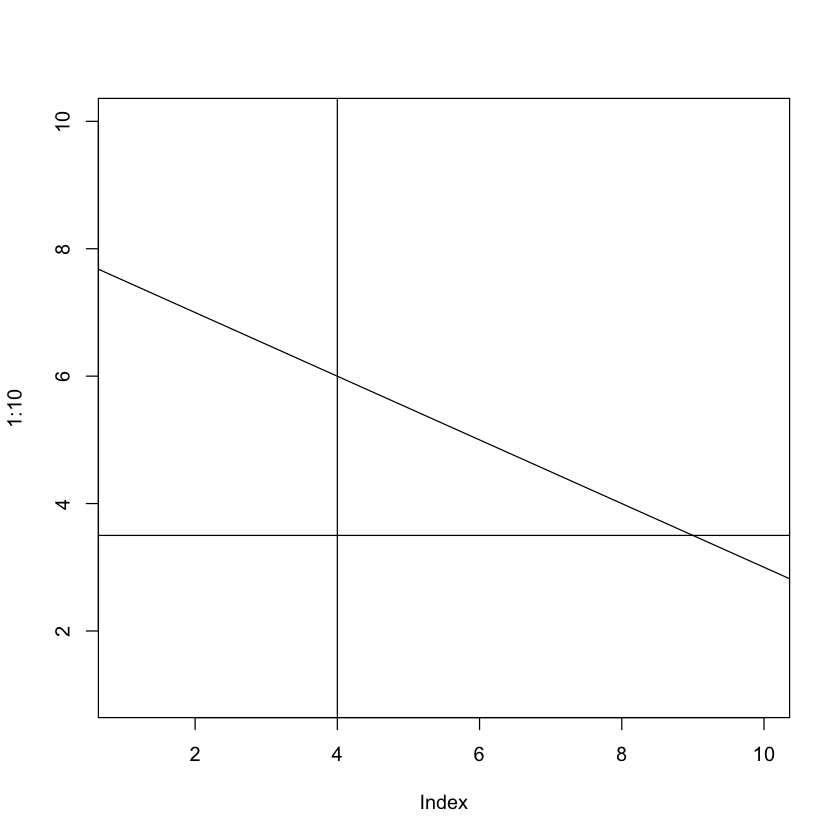

In [14]:
plot(1:10, type="n") 
abline(a=8, b=-0.5, h=3.5, v=4) # Add straight lines to graph

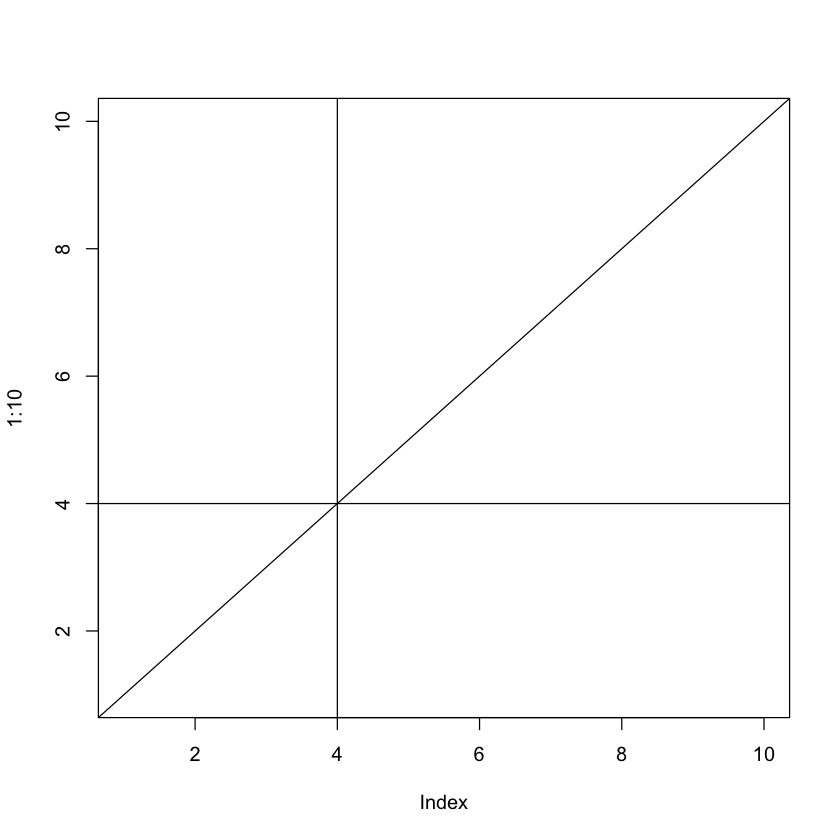

In [29]:
plot(1:10, type="n") 
abline(a=0, b=1, h=4, v=4) # Add straight lines to graph

## 线性回归

In [30]:
lm(y~x, data = andy) # regresses y on x using the data in datafile


Call:
lm(formula = y ~ x, data = andy)

Coefficients:
(Intercept)            x  
      -1717          101  


In [32]:
set.seed(34) #sets the seed for the random number generator

In [33]:
rm(list=ls()) #removes all objects in the current Environment 
              # except those that have names starting with a dot (.)

### The simple linear regression model 

The simple linear regression model assumes that the values of x are previously chosen (therefore, they are non-random), that the variance of the error term, σ2, is the same for all values of x, and that there is no connection between one observation and another (no correlation between the error terms of two observations). In addition, it is assumed that the expected value of the error term for any value of x is zero.

In [34]:
data("cps_small")

In [37]:
head(cps_small)

,wage,educ,exper,female,black,white,midwest,south,west
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2.03,13,2,1,0,1,0,1,0
2,2.07,12,7,0,0,1,1,0,0
3,2.12,12,35,0,0,1,0,1,0
4,2.54,16,20,1,0,1,0,1,0
5,2.68,12,24,1,0,1,0,1,0
6,3.09,13,4,0,0,1,0,1,0


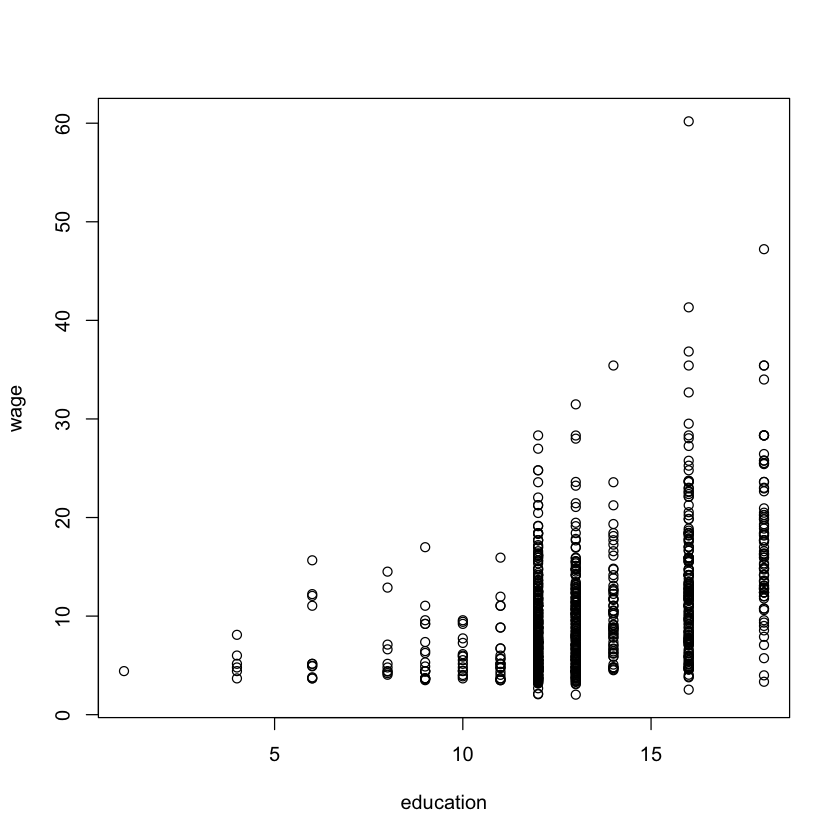

In [38]:
plot(cps_small$educ, cps_small$wage, xlab="education", ylab="wage")

In [39]:
data(food)
head(food)

,food_exp,income
,<dbl>,<dbl>
1,115.22,3.69
2,135.98,4.39
3,119.34,4.75
4,114.96,6.03
5,187.05,12.47
6,243.92,12.98


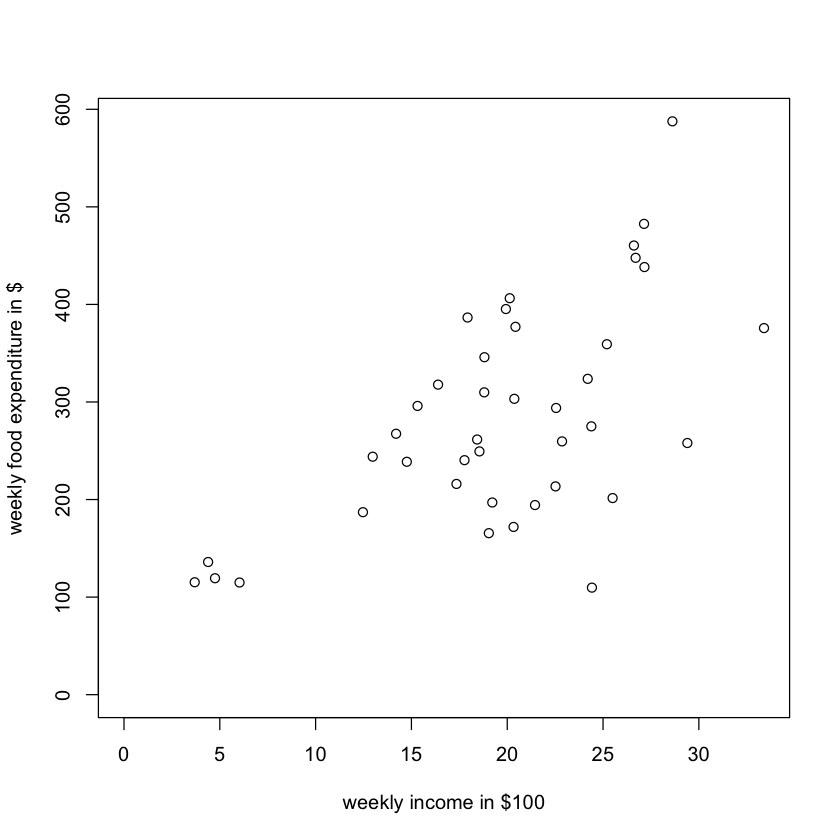

In [40]:
# 散点图
plot(food$income, food$food_exp, 
     ylim=c(0, max(food$food_exp)),      # 设置y轴范围
     xlim=c(0, max(food$income)), 
     xlab="weekly income in $100", 
     ylab="weekly food expenditure in $", 
     type = "p")

### 模型回归结果

It is useful to give the model a name, such as mod1, then show the results using summary(mod1).

In [41]:
mod1 <- lm(food_exp ~ income, data = food)

In [42]:
smod1 <- summary(mod1)

In [43]:
smod1


Call:
lm(formula = food_exp ~ income, data = food)

Residuals:
     Min       1Q   Median       3Q      Max 
-223.025  -50.816   -6.324   67.879  212.044 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   83.416     43.410   1.922   0.0622 .  
income        10.210      2.093   4.877 1.95e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 89.52 on 38 degrees of freedom
Multiple R-squared:  0.385,	Adjusted R-squared:  0.3688 
F-statistic: 23.79 on 1 and 38 DF,  p-value: 1.946e-05


In [45]:
b1 <- coef(mod1)[[1]]  # 提取回归参数
b2 <- coef(mod1)[[2]]

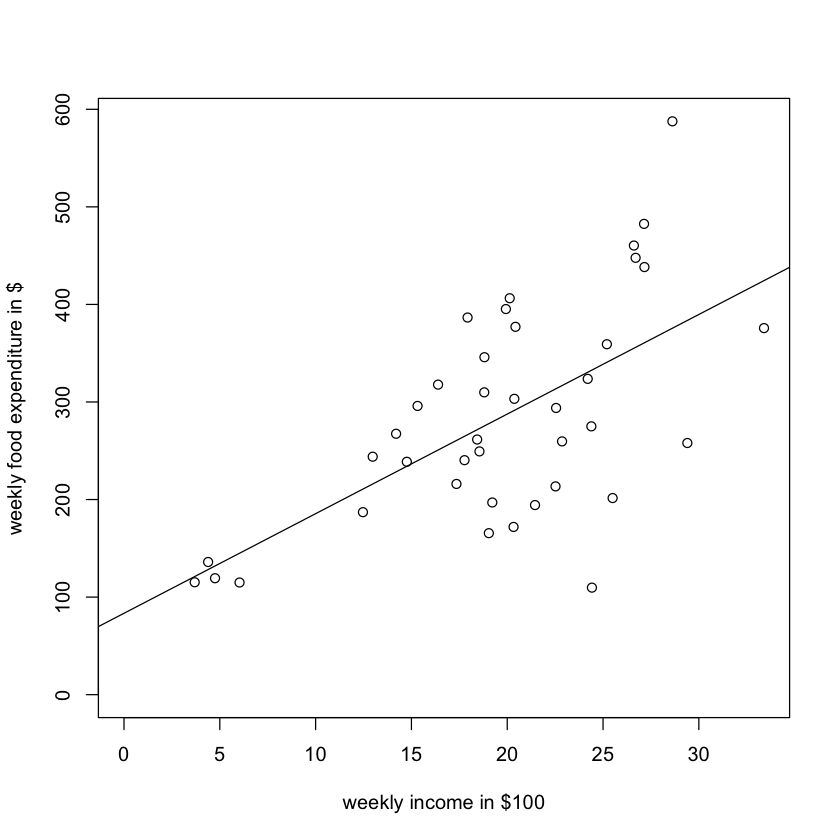

In [46]:
plot(food$income, food$food_exp, 
     ylim=c(0, max(food$food_exp)),      # 设置y轴范围
     xlim=c(0, max(food$income)), 
     xlab="weekly income in $100", 
     ylab="weekly food expenditure in $", 
     type = "p")
abline(b1,b2)

In [47]:
names(mod1) #list the names of all results in each object

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [48]:
names(smod1) 

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [49]:
mod1$coefficients

(Intercept)      income 
   83.41600    10.20964

In [50]:
smod1$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),83.41600,43.410163,1.921578,6.218242e-02
income,10.20964,2.093264,4.877381,1.945862e-05


In [51]:
coef(mod1) 

(Intercept)      income 
   83.41600    10.20964

In [52]:
resid(mod1) 

1           2           3           4           5           6 
  -5.869585    7.743665  -12.571806  -30.020149  -23.680250   27.982832 
          7           8           9          10          11          12 
  39.037068    4.599668   56.112268   67.027950  -44.553308  -24.491358 
         13          14          15          16          17          18 
 120.095100  -10.049722  -23.464879   34.512710   70.430614 -112.267604 
         19          20          21          22          23          24 
 -82.665340  108.365814  117.403885 -119.058044   11.843571   85.040992 
         25          26          27          28          29          30 
-108.062844  -99.857162  -19.773451  -57.198440   -6.779362  -57.409194 
         31          32          33          34          35          36 
-223.025483   18.490995 -142.251898  105.265399   91.746531  122.044288 
         37          38          39          40 
  77.580095  212.044016 -125.629505  -48.688077

In [53]:
fitted(mod1) 

1        2        3        4        5        6        7        8 
121.0896 128.2363 131.9118 144.9801 210.7302 215.9372 228.3929 234.1103 
       9       10       11       12       13       14       15       16 
239.8277 250.7521 260.5533 264.8414 266.4749 271.5797 272.8049 275.3573 
      17       18       19       20       21       22       23       24 
275.4594 277.8076 279.6453 286.8942 288.9361 290.9780 291.3864 291.9990 
      25       26       27       28       29       30       31       32 
302.4128 313.3372 313.6435 316.8084 330.4894 332.4292 332.7355 340.6990 
      33       34       35       36       37       38       39       40 
343.7619 355.0946 356.0135 360.5057 360.7099 375.6160 383.5795 424.4181

In [54]:
vcov(mod1) #Estimated Variances and Covariance

,(Intercept),income
(Intercept),1884.44226,-85.903157
income,-85.90316,4.381752


### 模型预测

In [55]:
newx <- data.frame(income = c(20, 25, 27)) 
yhat <- predict(mod1, newx) 
names(yhat) <- c("income=$2000", "$2500", "$2700") 
yhat # prints the result

income=$2000        $2500        $2700 
    287.6089     338.6571     359.0764

### 子样本

A random subsample can be constructed using the function sample()

In [3]:
library(PoEdata)
data(food)

In [4]:
N <- nrow(food) # returns the number of observations in the dataset 
C <- 50 # desired number of subsamples 
S <- 38 # desired sample size

In [5]:
sumb2 <- 0 
for (i in 1:C){# a loop over the number of subsamples 
    set.seed(3*i) # a different seed for each subsample 
    subsample <- food[sample(1:N, size=S, replace=TRUE), ] 
    mod2 <- lm(food_exp~income, data=subsample) 
    #sum b2 for all subsamples: 
    sumb2 <- sumb2 + coef(mod2)[[2]] } 
    print(sumb2/C, digits = 3)

[1] 9.89


## 非线性回归

In [6]:
library(PoEdata) 
data(br) 
mod3 <- lm(price~I(sqft^2), data=br) 
b1 <- coef(mod3)[[1]] 
b2 <- coef(mod3)[[2]] 
sqftx=c(2000, 4000, 6000) #given values for sqft 
pricex=b1+b2*sqftx^2 #prices corresponding to given sqft 
DpriceDsqft <- 2*b2*sqftx # marginal effect of sqft on price

In [7]:
elasticity=DpriceDsqft*sqftx/pricex 
b1; b2; DpriceDsqft; elasticity #prints results

[1] 55776.57

[1] 0.0154213

[1]  61.68521 123.37041 185.05562

[1] 1.050303 1.631251 1.817408

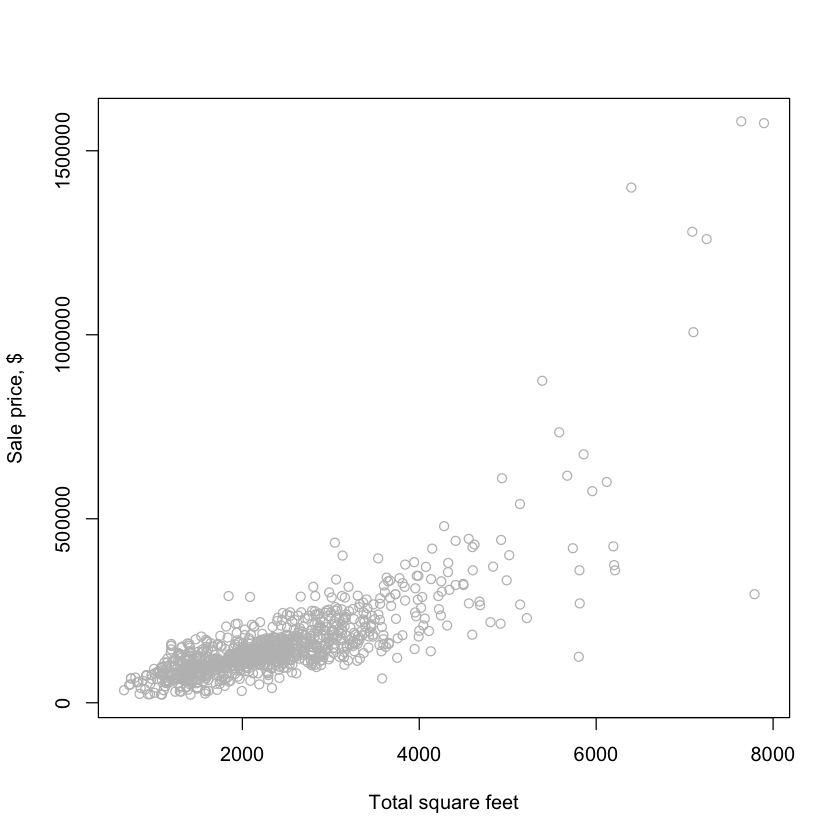

In [8]:
plot(br$sqft, br$price, xlab="Total square feet", ylab="Sale price, $", col="grey")

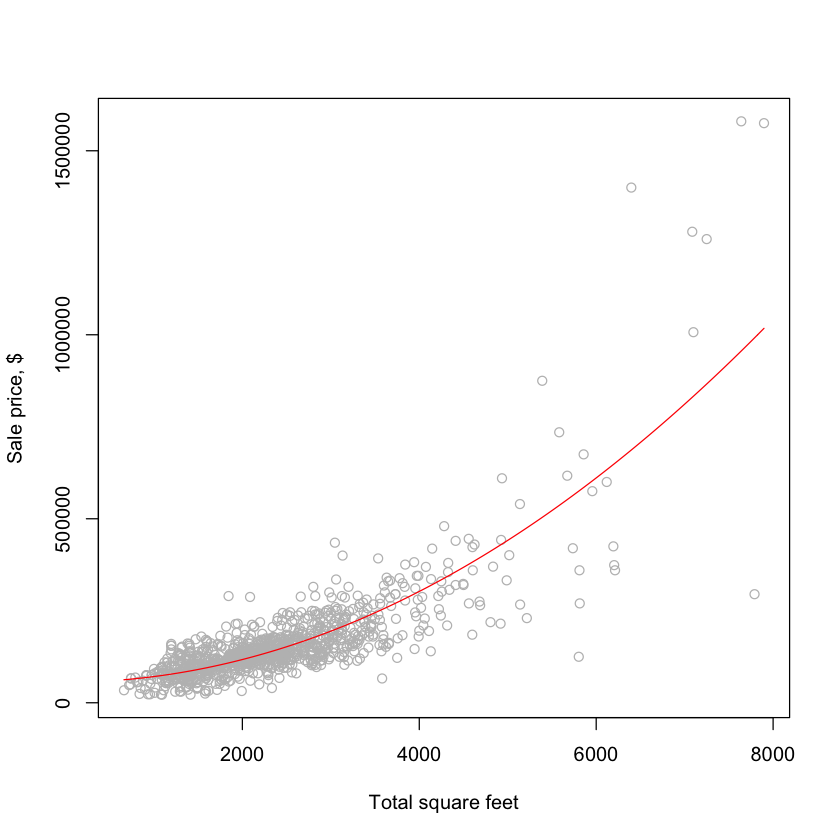

In [9]:
plot(br$sqft, br$price, xlab="Total square feet", ylab="Sale price, $", col="grey") 
#add the quadratic curve to the scatter plot: 
curve(b1+b2*x^2, col="red", add=TRUE)

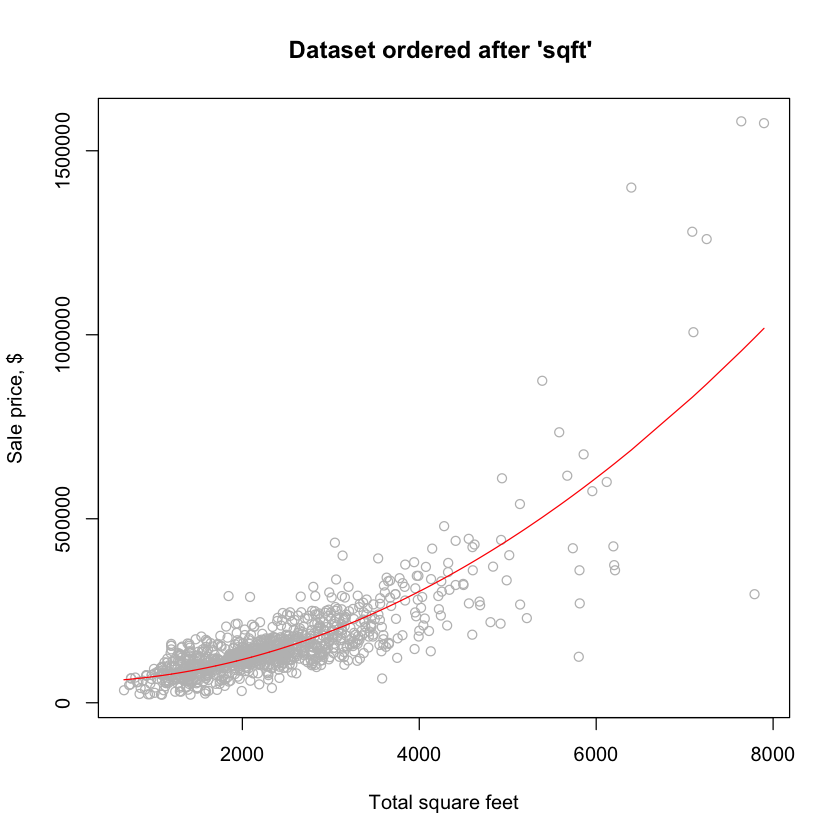

In [10]:
ordat <- br[order(br$sqft), ] #sorts the dataset after `sqft` 
mod31 <- lm(price~I(sqft^2), data=ordat) 
plot(br$sqft, br$price, 
     main="Dataset ordered after 'sqft' ", 
     xlab="Total square feet", 
     ylab="Sale price, $", col="grey") 
lines(fitted(mod31)~ordat$sqft, col="red")

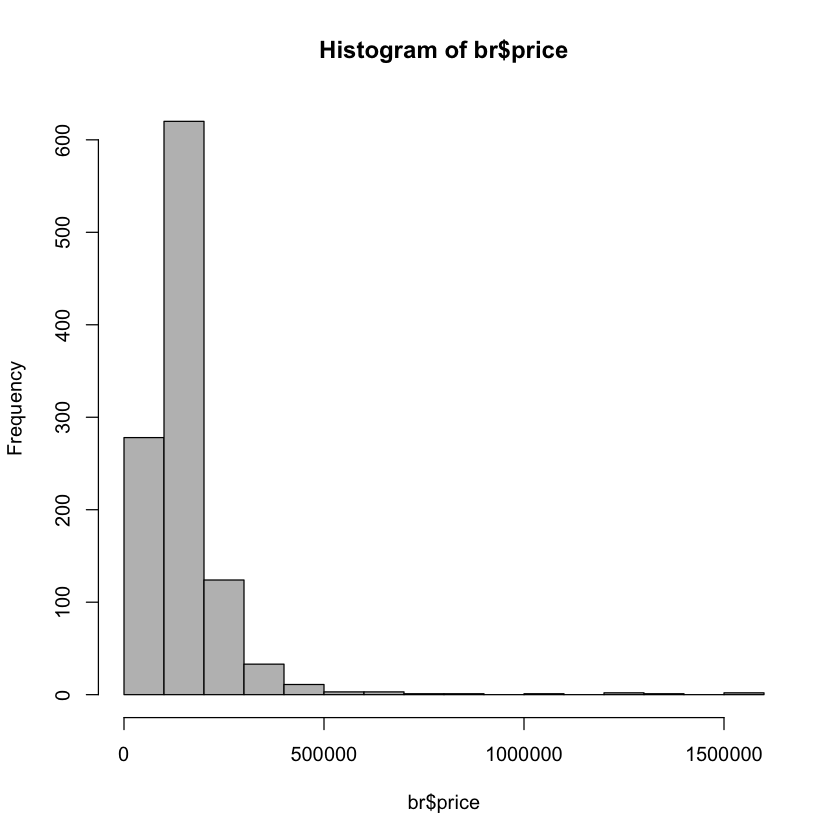

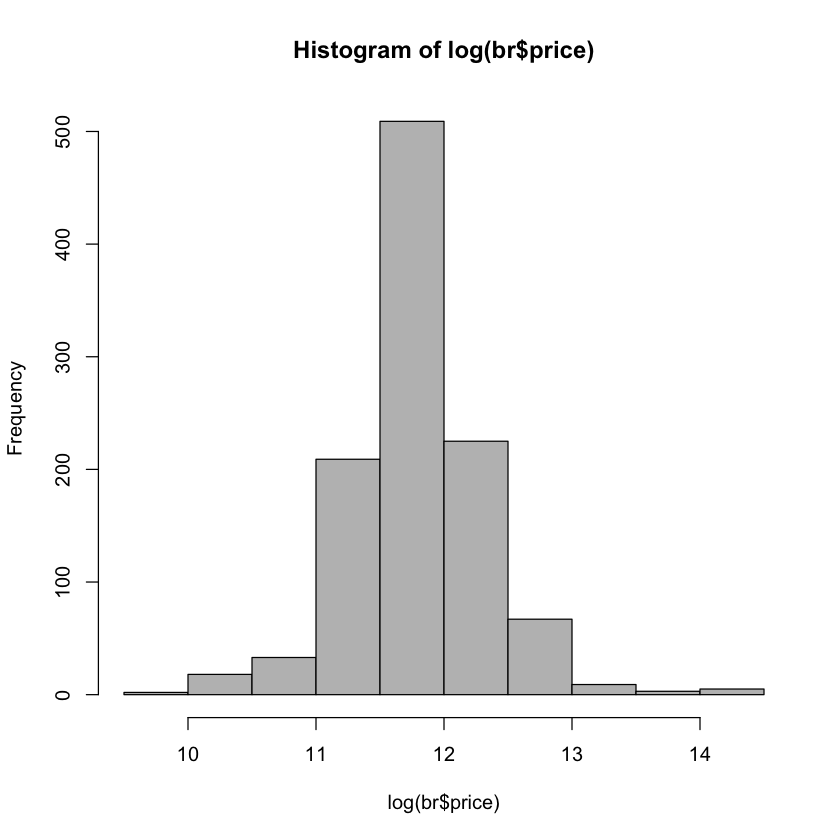

In [11]:
hist(br$price, col='grey') 
hist(log(br$price), col='grey')

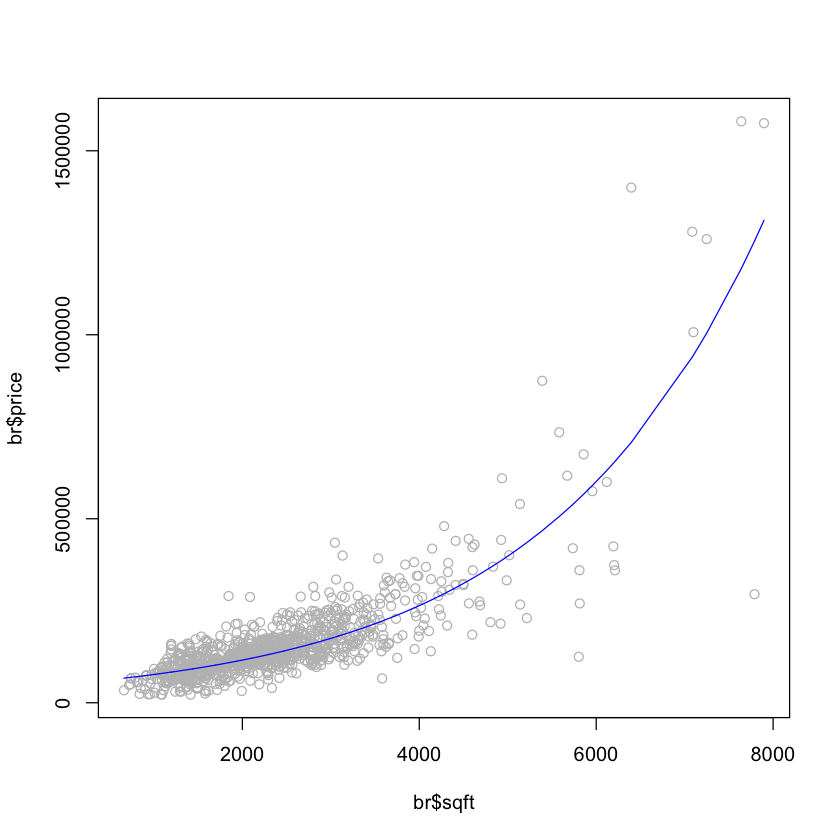

In [12]:
ordat <- br[order(br$sqft), ] #order the dataset 
mod4 <- lm(log(price)~sqft, data=ordat) 
plot(br$sqft, br$price, col="grey") 
lines(exp(fitted(mod4))~ordat$sqft, col="blue", main="Log-linear Model")

In [17]:
pricex<- median(br$price) 
sqftx <- (log(pricex)-coef(mod4)[[1]])/coef(mod4)[[2]] 
(DyDx <- pricex*coef(mod4)[[2]])

[1] 53.46495

In [18]:
(elasticity <- sqftx*coef(mod4)[[2]])

[1] 0.9366934

In [16]:
pricex <- c(100000, exp(b1+b2*sqftx)) 
#re-calculate sqft for all prices: 
sqftx <- (log(pricex)-b1)/b2 
#calculate and print elasticities: 
(elasticities <- b2*sqftx)

[1] -55765.05       Inf

## 虚拟变量

In [19]:
data(utown) 
price0bar <- mean(utown$price[which(utown$utown==0)]) 
price1bar <- mean(utown$price[which(utown$utown==1)])

In [24]:
head(utown)

,price,sqft,age,utown,pool,fplace
,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,205.452,23.46,6,0,0,1
2,185.328,20.03,5,0,0,1
3,248.422,27.77,6,0,0,0
4,154.690,20.17,1,0,0,0
5,221.801,26.45,0,0,0,1
6,199.119,21.56,6,0,0,1


In [20]:
mod5 <- lm(price~utown, data=utown) 
b1 <- coef(mod5)[[1]] 
b2 <- coef(mod5)[[2]]

In [23]:
b1;b2

[1] 215.7325

[1] 61.50911

price = b1= 215.73 for non-university houses, and price = b1+ b2= 277.24 for university houses.

## Monte Carlo 模拟

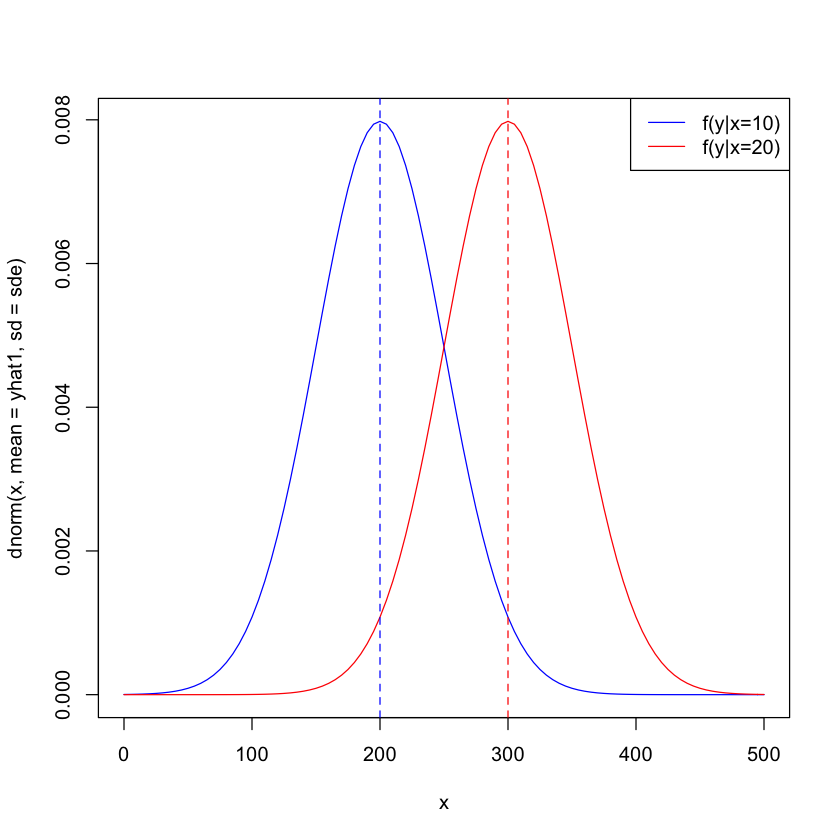

In [25]:
N <- 40 
x1 <- 10 
x2 <- 20 
b1 <- 100 
b2 <- 10 
mu <- 0 
sig2e <- 2500 
sde <- sqrt(sig2e) 
yhat1 <- b1+b2*x1 
yhat2 <- b1+b2*x2 
curve(dnorm(x, mean=yhat1, sd=sde), 0, 500, col="blue") 
curve(dnorm(x, yhat2, sde), 0,500, add=TRUE, col="red") 
abline(v=yhat1, col="blue", lty=2) 
abline(v=yhat2, col="red", lty=2) 
legend("topright", legend=c("f(y|x=10)", "f(y|x=20)"), lty=1, col=c("blue", "red")) # 添加图例

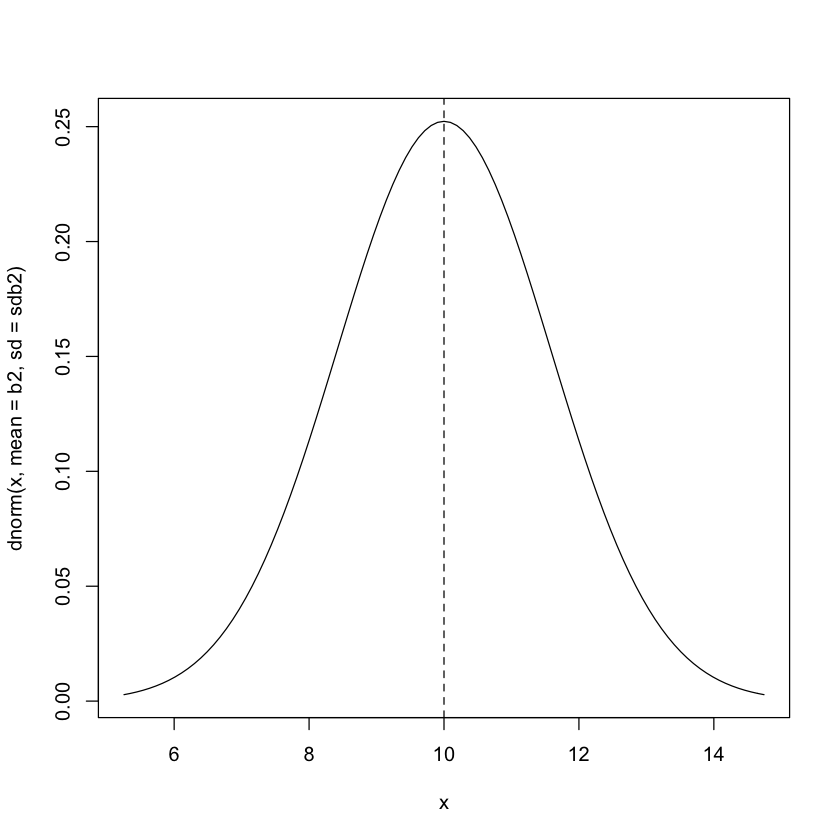

In [26]:
x <- c(rep(x1, N/2), rep(x2,N/2)) # rep:'repeat x2 N/2 times'
xbar <- mean(x) 
sumx2 <- sum((x-xbar)^2) 
varb2 <- sig2e/sumx2 
sdb2 <- sqrt(varb2) 
leftlim <- b2-3*sdb2 
rightlim <- b2+3*sdb2 
curve(dnorm(x, mean=b2, sd=sdb2), leftlim, rightlim) 
abline(v=b2, lty=2)

In [28]:
set.seed(12345) 
y <- b1+b2*x+rnorm(N, mean=0, sd=sde) 
mod6 <- lm(y~x) 
b1hat <- coef(mod6)[[1]]
b2hat <- coef(mod6)[[2]] 
mod6summary <- summary(mod6) #the summary contains the standard errors 
(seb2hat <- coef(mod6summary)[2,2])

[1] 1.64203

In [29]:
data("food") 
N <- 40 
sde <- 50 
x <- food$income 
nrsim <- 1000 
b1 <- 100 
b2 <- 10 
vb2 <- numeric(nrsim) #stores the estimates of b2 
for (i in 1:nrsim){
    set.seed(12345+10*i) 
    y <- b1+b2*x+rnorm(N, mean=0, sd=sde) 
    mod7 <- lm(y~x) 
    vb2[i] <- coef(mod7)[[2]] 
} 
mb2 <- mean(vb2) 
seb2 <- sd(vb2)

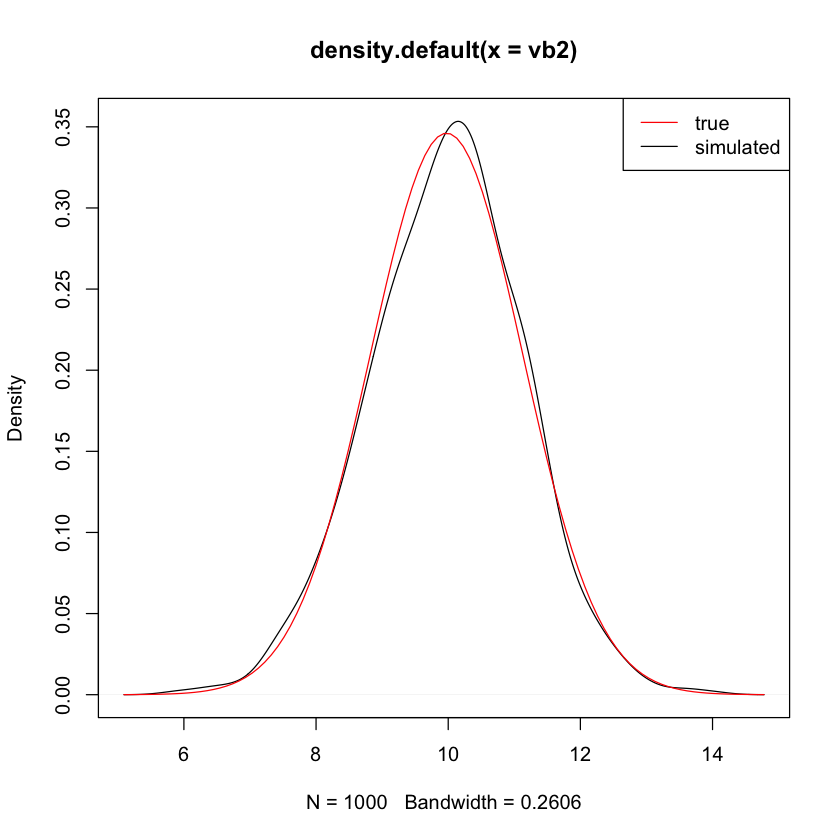

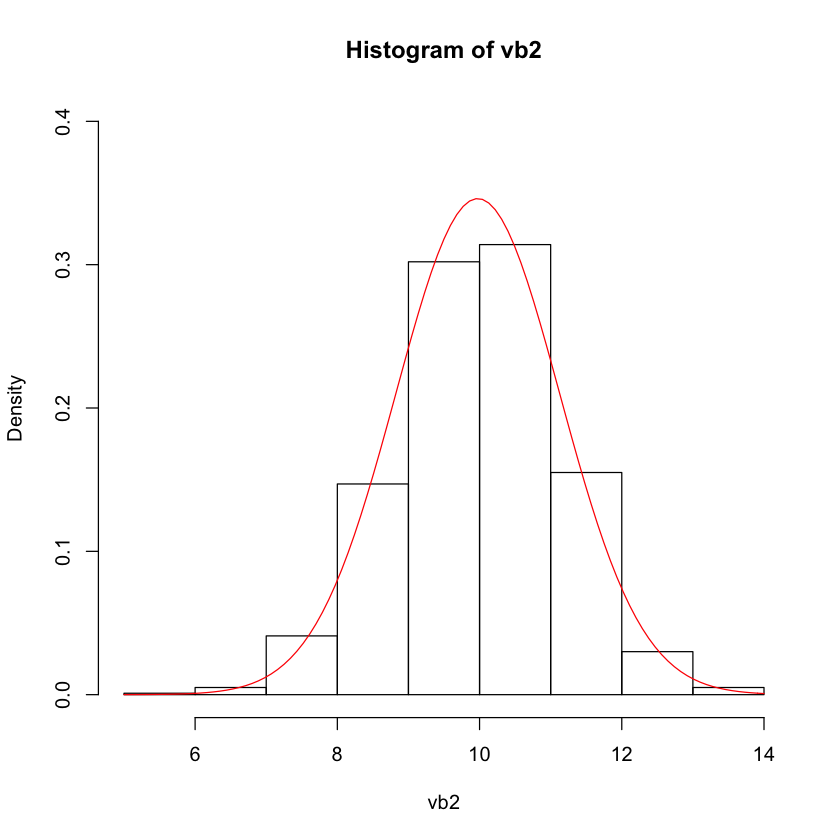

In [30]:
plot(density(vb2)) 
curve(dnorm(x, mb2, seb2), col="red", add=TRUE) 
legend("topright", legend=c("true", "simulated"), lty=1, col=c("red", "black")) 
hist(vb2, prob=TRUE, ylim=c(0,.4)) 
curve(dnorm(x, mean=mb2, sd=seb2), col="red", add=TRUE)

## 区间估计

For the uniform distribution: 

    – dunif(x, min = 0, max = 1) 
    
    – punif(q, min = 0, max = 1, lower.tail = TRUE) 
    
    – qunif(p, min = 0, max = 1, lower.tail = TRUE) 
    
    – runif(n, min = 0, max = 1)

For the t distribution: 

    – dt(x, df) 

    – pt(q, df, lower.tail = TRUE) 

    – qt(p, df, lower.tail = TRUE) 

    – rt(n, df)

For the $χ^2$distribution: 

    – dchisq(x, df) 

    – pchisq(q, df, lower.tail = TRUE) 

    – qchisq(p, df, lower.tail = TRUE) 

    – rchisq(n, df)

### Example: Confidence Intervals in the food Model

In [31]:
library(PoEdata) 
data("food") 
alpha <- 0.05 # chosen significance level 
mod1 <- lm(food_exp~income, data=food) 
b2 <- coef(mod1)[[2]] 
df <- df.residual(mod1) # degrees of freedom 
smod1 <- summary(mod1) 
seb2 <- coef(smod1)[2,2] # se(b2) 
tc <- qt(1-alpha/2, df) 
lowb <- b2-tc*seb2 # lower bound 
upb <- b2+tc*seb2 # upper bound

In [32]:
lowb;upb

[1] 5.972052

[1] 14.44723

In [34]:
ci <- confint(mod1) # calculate confidence intervals 

                2.5 %    97.5 %
(Intercept) -4.463279 171.29528
income       5.972052  14.44723


In [35]:
(lowb_b2 <- ci[2, 1]) # lower bound 

[1] 5.972052

In [36]:
(upb_b2 <- ci[2, 2]) # upper bound.

[1] 14.44723

In [37]:
rep(0, 10)

[1] 0 0 0 0 0 0 0 0 0 0

In [38]:
numeric(10)

[1] 0 0 0 0 0 0 0 0 0 0

### Confidence Intervals in Repeated Samples

In [46]:
data("table2_2")
head(table2_2)

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.69,120.93,109.44,119.81,111.41,114.23,121.78,109.78,111.59,126.26,105.83
2,4.39,125.56,100.68,124.44,144.04,154.38,120.78,104.38,93.91,95.69,113.47
3,4.75,89.86,133.42,182.61,135.65,108.84,106.94,155.33,140.37,151.67,142.51
4,6.03,221.36,117.48,123.08,144.17,119.98,144.70,157.18,151.62,139.78,141.92
5,12.47,150.27,266.47,157.70,69.90,232.82,148.05,169.46,277.69,152.20,232.57
6,12.98,142.26,255.37,243.81,106.20,89.61,170.55,151.06,130.85,196.40,177.42


In [40]:
alpha <- 0.05 
mod1 <- lm(y1~x, data=table2_2) # just to determine df 
tc <- qt(1-alpha/2, df) # critical t 
# Initiate four vectors that will store the results: 
lowb1 <- rep(0, 10) # 'repeat 0 ten times' 
upb1 <- rep(0, 10) # (alternatively, 'numeric(10)') 
lowb2 <- rep(0, 10) 
upb2 <-rep(0, 10)

In [44]:
library(xtable)
library(knitr)

In [45]:
# One loop for each set of income: 
for(i in 2:11){ # The curly bracket begins the loop 
    dat <- data.frame(cbind(table2_2[,1], table2_2[,i])) 
    names(dat) <- c("x", "y") 
    mod1 <- lm(y~x, data=dat) 
    smod1 <- summary(mod1) 
    b1 <- coef(mod1)[[1]] 
    b2 <- coef(mod1)[[2]] 
    seb1 <- coef(smod1)[1,2]
    seb2 <- coef(smod1)[2,2] 
    lowb1[i-1] <- b1-tc*seb1 
    upb1[i-1] <- b1+tc*seb1 
    lowb2[i-1] <- b2-tc*seb2 
    upb2[i-1] <- b2+tc*seb2
} # This curly bracket ends the loop 
table <- data.frame(lowb1, upb1, lowb2, upb2) 
kable(table, 
      caption="Confidence intervals for $b_{1}$ and $b_{2}$", 
      align="c")



|    lowb1    |   upb1   |  lowb2   |   upb2   |
|:-----------:|:--------:|:--------:|:--------:|
| 49.5421816  | 213.8462 | 2.518429 | 10.44127 |
| -9.8310966  | 124.3235 | 7.648383 | 14.11739 |
| 28.5566807  | 179.2635 | 4.505533 | 11.77271 |
| -20.9594439 | 113.9681 | 8.648168 | 15.15445 |
|  0.9311682  | 167.5339 | 5.271200 | 13.30488 |
| -66.0448473 | 119.3018 | 9.081885 | 18.01941 |
| -0.6297526  | 129.0463 | 7.806179 | 14.05923 |
| 19.1947213  | 140.1291 | 6.848891 | 12.68042 |
| 38.3157013  | 156.2870 | 5.206310 | 10.89496 |
| 20.6917444  | 171.2318 | 4.139676 | 11.39880 |

In [49]:
table$lowb1

[1]  49.5421816  -9.8310966  28.5566807 -20.9594439   0.9311682 -66.0448473
 [7]  -0.6297526  19.1947213  38.3157013  20.6917444

## 假设检验

Hypothesis testing seeks to establish whether the data sample at hand provides sufficient evidence to support a certain conjecture (hypothesis) about a population parameter such as the intercept in a regresion model

In [50]:
alpha <- 0.05 
library(PoEdata); library(xtable); library(knitr) 
data("food") 
mod1 <- lm(food_exp~income, data=food) 
smod1 <- summary(mod1) 
table <- data.frame(xtable(mod1)) 
kable(table, caption="Regression output showing the coefficients")



|            | Estimate| Std..Error|  t.value|  Pr...t..|
|:-----------|--------:|----------:|--------:|---------:|
|(Intercept) | 83.41600|  43.410163| 1.921578| 0.0621824|
|income      | 10.20964|   2.093263| 4.877381| 0.0000195|

In [51]:
b2 <- coef(mod1)[["income"]] #coefficient on income # or: b2 <- coef(mod1)[[2]] # the coefficient on income 
seb2 <- sqrt(vcov(mod1)[2,2]) #standard error of b2 
df <- df.residual(mod1) # degrees of freedom 
t <- b2/seb2 
tcr <- qt(1-alpha/2, df)

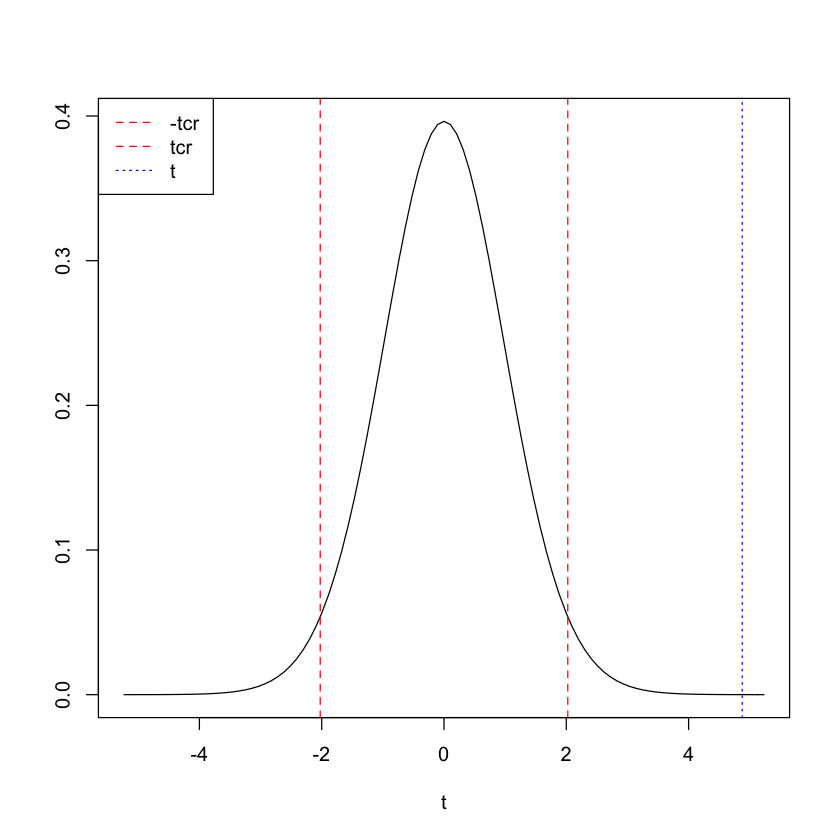

In [52]:
# Plot the density function and the values of t: 
curve(dt(x, df), -2.5*seb2, 2.5*seb2, ylab=" ", xlab="t") 
abline(v=c(-tcr, tcr, t), col=c("red", "red", "blue"),lty=c(2,2,3)) 
legend("topleft", legend=c("-tcr", "tcr", "t"), col= c("red", "red", "blue"), lty=c(2, 2, 3))

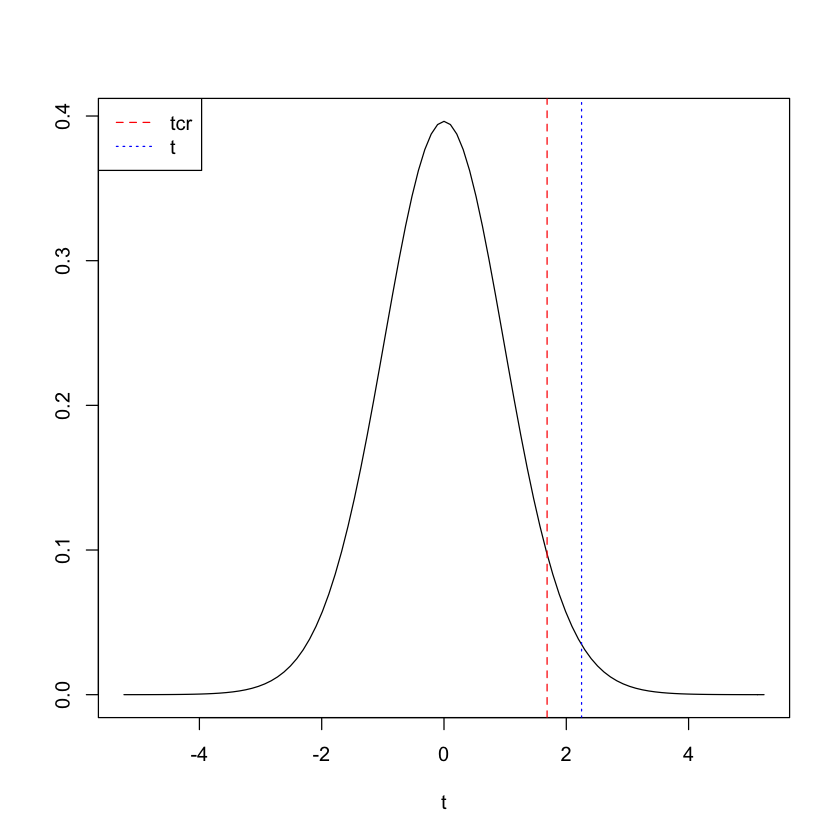

In [53]:
c <- 5.5 
alpha <- 0.05 
t <- (b2-c)/seb2 
tcr <- qt(1-alpha, df) # note: alpha is not divided by 2 
curve(dt(x, df), -2.5*seb2, 2.5*seb2, ylab=" ", xlab="t") 
abline(v=c(tcr, t), col=c("red", "blue"), lty=c(2, 3)) 
legend("topleft", legend=c("tcr", "t"), col=c("red", "blue"), lty=c(2, 3))

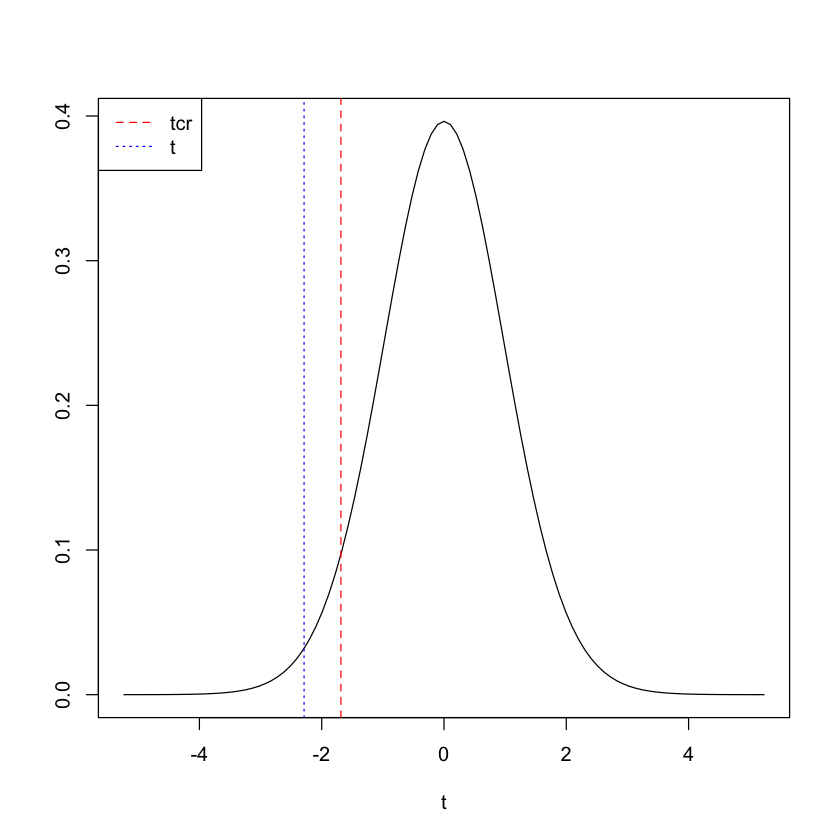

In [54]:
c <- 15 
alpha <- 0.05 
t <- (b2-c)/seb2 
tcr <- qt(alpha, df) # note: alpha is not divided by 2 
curve(dt(x, df), -2.5*seb2, 2.5*seb2, ylab=" ", xlab="t") 
abline(v=c(tcr, t), col=c("red", "blue"), lty=c(2, 3)) 
legend("topleft", legend=c("tcr", "t"), col=c("red", "blue"), lty=c(2, 3))

In [55]:
library(PoEdata) 
data("food") 
mod1 <- lm(food_exp ~ income, data = food) 
table <- data.frame(round(xtable(summary(mod1)), 3)) 
kable(table, caption = "Regression output for the 'food' model")



|            | Estimate| Std..Error| t.value| Pr...t..|
|:-----------|--------:|----------:|-------:|--------:|
|(Intercept) |   83.416|     43.410|   1.922|    0.062|
|income      |   10.210|      2.093|   4.877|    0.000|

### The p-Value

Right-tail test, $H_0: β_2≤ c, H_A: β_2> c.$

In [58]:
# Calculating the p-value for a right-tail test 
c <- 5.5 
t <- (b2-c)/seb2 
p <- 1-pt(t, df) # pt() returns p-values;
p

[1] 0.01516329

Left-tail test, $H_0: β_2≥ c, H_A: β_2< c.$

In [59]:
# Calculating the p-value for a left-tail test 
c <- 15 
t <- (b2-c)/seb2 
p <- pt(t, df)
p

[1] 0.01388071

Two-tail test, $H_0: β_2= c, HA: β_2= c.$

In [61]:
# Calculating the p-value for a two-tail test 
c <- 0 
t <- (b2-c)/seb2 
p <- 2*(1-pt(abs(t), df))
p 

[1] 1.945862e-05

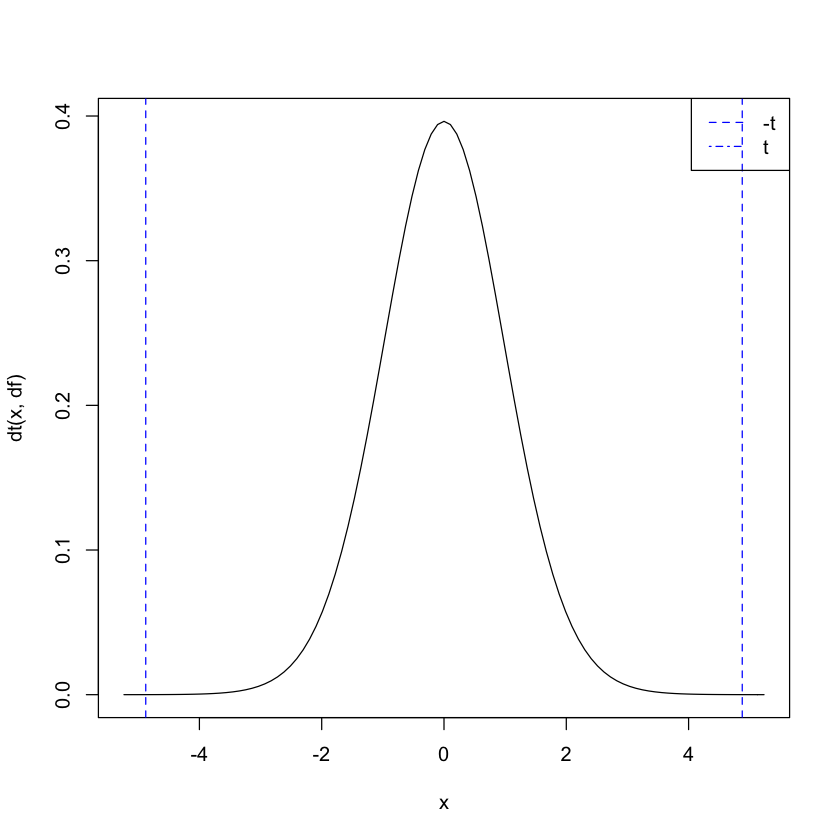

In [63]:
curve(dt(x, df), from=-2.5*seb2, to=2.5*seb2) 
abline(v=c(-t, t), col=c("blue", "blue"), lty=c(2, 2))
legend("topright", legend=c("-t", "t"), col=c("blue", "blue"), lty=c(2, 4))

In [64]:
table <- data.frame(xtable(smod1)) 
knitr::kable(table, caption= "Regression output showing p-values")



|            | Estimate| Std..Error|  t.value|  Pr...t..|
|:-----------|--------:|----------:|--------:|---------:|
|(Intercept) | 83.41600|  43.410163| 1.921578| 0.0621824|
|income      | 10.20964|   2.093263| 4.877381| 0.0000195|

### Testing Linear Combinations of Parameters

In [65]:
library(PoEdata) 
data("food") 
alpha <- 0.05 
x <- 20 # income is in 100s, remember? 
m1 <- lm(food_exp~income, data=food) 
tcr <- qt(1-alpha/2, df) # rejection region right of tcr.
df <- df.residual(m1) 
b1 <- m1$coef[1] 
b2 <- m1$coef[2] 
varb1 <- vcov(m1)[1, 1] 
varb2 <- vcov(m1)[2, 2] 
covb1b2 <- vcov(m1)[1, 2] 
L <- b1+b2*x # estimated L 
varL = varb1 + x^2 * varb2 + 2*x*covb1b2 # var(L) 
seL <- sqrt(varL) # standard error of L 
lowbL <- L-tcr*seL 
upbL <- L+tcr*seL

In [70]:
library('asbio')

ERROR: Error in library("asbio"): there is no package called ‘asbio’


In [68]:
shade.norm(above=1.6, justabove=TRUE) 
segments(1.6,0,1.6,0.2,col="blue", lty=3) 
legend("topleft", legend="t", col="blue", lty=3) 

ERROR: Error in shade.norm(above = 1.6, justabove = TRUE): 没有"shade.norm"这个函数


In [ ]:
.shadenorm(above=-1.6, justabove=TRUE) 
segments(-1.6,0,-1.6,0.2,col="blue", lty=3) 
legend("topleft", legend="t", col="blue", lty=3)

In [71]:
c <- 250 
alpha <- 0.05 
t <- (L-c)/seL # t < tcr --> Reject Ho.
tcr <- qt(1-alpha/2, df) # Or, we can calculate the p-value, as follows: 
p_value <- 2*(1-pt(abs(t), df)) #p<alpha -> Reject Ho

In [73]:
t;tcr 

(Intercept) 
   2.652613

[1] 2.024394

In [72]:
p_value

(Intercept) 
 0.01159078

## Prediction, R-squared, and Modeling

In [74]:
rm(list=ls()) # Caution: this clears the Environment